<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/03_Convolutional_Neural_Networks_and_Computer_Vision_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self driving car recognizing the car in front.

# Get the data

The images that we are working with are from the Food101 dataset (101 different classes of food ) : https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook.

Note : 🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

We'll download the pizza_steak subset .zip file and unzip it.



We will start with the small dataset so that we can experiment quickly and figure what works (or better yet what doesn't work)



In [1]:
import zipfile

#Download the zip file of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()




--2023-12-14 20:12:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c03::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  72.3MB/s    in 1.4s    

2023-12-14 20:12:36 (72.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspeact the data (Become one with it)

A very crutial step at the beginning of any machine learning project is becoming one with the data and for computer vision project...this usually means visualizing many sampleas of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/


pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

#Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print((f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ."))

there are 2 directories and 0 images in 'pizza_steak' .
there are 2 directories and 0 images in 'pizza_steak/test' .
there are 0 directories and 250 images in 'pizza_steak/test/steak' .
there are 0 directories and 250 images in 'pizza_steak/test/pizza' .
there are 2 directories and 0 images in 'pizza_steak/train' .
there are 0 directories and 750 images in 'pizza_steak/train/steak' .
there are 0 directories and 750 images in 'pizza_steak/train/pizza' .


In [6]:
!ls -la pizza_steak    #Also lists the files which are hidden

total 16
drwxr-xr-x 4 root root 4096 Dec 14 20:12 .
drwxr-xr-x 1 root root 4096 Dec 14 20:12 ..
drwxr-xr-x 4 root root 4096 Dec 14 20:12 test
drwxr-xr-x 4 root root 4096 Dec 14 20:12 train


In [7]:
#another way to find out how many images are in the directory

num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

# To visualize our images, first let's get the class names programmatically



In [8]:
#Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
class_names = class_names[0:]
print(class_names)


['pizza' 'steak']


In [9]:
#Let's visualize our images

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") #Print the image shape

  return img

['179293.jpg']
Image shape : (384, 512, 3)


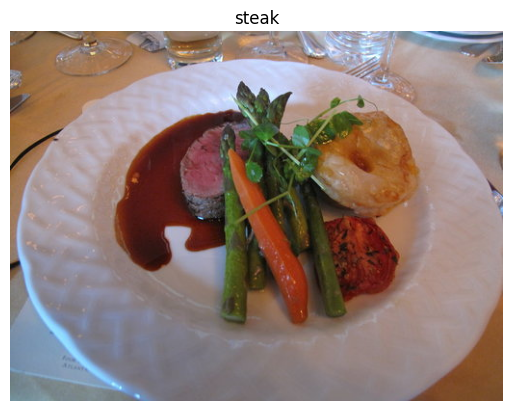

In [10]:
#View  a random Image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
#The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[103,  86,  68],
        [102,  85,  67],
        [109,  91,  71],
        ...,
        [170, 158, 170],
        [166, 154, 166],
        [163, 151, 163]],

       [[119, 102,  84],
        [116,  99,  81],
        [117,  99,  79],
        ...,
        [137, 139, 152],
        [125, 127, 140],
        [117, 119, 132]],

       [[123, 106,  88],
        [121, 104,  86],
        [119, 101,  81],
        ...,
        [ 73,  85,  99],
        [ 63,  79,  94],
        [ 59,  75,  90]],

       ...,

       [[115, 145, 156],
        [114, 144, 155],
        [115, 143, 155],
        ...,
        [117,  76,  44],
        [117,  76,  46],
        [117,  76,  46]],

       [[115, 145, 156],
        [115, 145, 156],
        [115, 145, 156],
        ...,
        [117,  76,  46],
        [116,  75,  45],
        [116,  75,  45]],

       [[115, 144, 158],
        [115, 144, 158],
        [117, 147, 158],
        ...,
        [117,  76,  4

In [12]:
#View the image shape
img.shape # returns width, height, color chanals


(384, 512, 3)

#Note
As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images to scale (Also refered to ass normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [13]:
# Get all the pixel values between 0 & 1

img/255.

array([[[0.40392157, 0.3372549 , 0.26666667],
        [0.4       , 0.33333333, 0.2627451 ],
        [0.42745098, 0.35686275, 0.27843137],
        ...,
        [0.66666667, 0.61960784, 0.66666667],
        [0.65098039, 0.60392157, 0.65098039],
        [0.63921569, 0.59215686, 0.63921569]],

       [[0.46666667, 0.4       , 0.32941176],
        [0.45490196, 0.38823529, 0.31764706],
        [0.45882353, 0.38823529, 0.30980392],
        ...,
        [0.5372549 , 0.54509804, 0.59607843],
        [0.49019608, 0.49803922, 0.54901961],
        [0.45882353, 0.46666667, 0.51764706]],

       [[0.48235294, 0.41568627, 0.34509804],
        [0.4745098 , 0.40784314, 0.3372549 ],
        [0.46666667, 0.39607843, 0.31764706],
        ...,
        [0.28627451, 0.33333333, 0.38823529],
        [0.24705882, 0.30980392, 0.36862745],
        [0.23137255, 0.29411765, 0.35294118]],

       ...,

       [[0.45098039, 0.56862745, 0.61176471],
        [0.44705882, 0.56470588, 0.60784314],
        [0.45098039, 0

#An end-to-end example  of Convolutional Neural Network

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to :

* 1.Load our images
* 2.Preprocess our images
* 3.Build a CNN to find patterns in our images
* 4.Compile our CNN
* 5.Fit the CNN to our training data



In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#1.Load our images
#Set the seed
tf.random.set_seed(42)

#Preprocess data (Get all of the pixel values between 0 & 1, also called scaling/ Normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup path to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


#2.Preprocess our images
#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size =(224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#3.Build a CNN to find patterns in our images (Same as the tiny VGG on the CNN explanner website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)), # 3 is for colour channels

    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size =2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#4.Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#5.Fit the CNN to our training data
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))      #. len would be totalimages/batch size


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 161ms/step - loss: 0.5802 - accuracy: 0.6913 - val_loss: 0.5269 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4574 - accuracy: 0.8033 - val_loss: 0.3934 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4115 - accuracy: 0.8160 - val_loss: 0.3834 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3936 - accuracy: 0.8327 - val_loss: 0.3309 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3420 - accuracy: 0.8567 - val_loss: 0.3604 - val_accuracy: 0.8380


# CPU VS GPU
NOTE : If the above cell is taking more than 10 seconds per epoch, make sure, you're using the GPU instead of regular way of running

#REGULAR RUNNING WITHOUT GPU

Found 1500 images belonging to 2 classes.

Found 500 images belonging to 2 classes.

Epoch 1/5
47/47 [==============================] - 101s 2s/step - loss: 0.5213 - accuracy: 0.7247 - val_loss: 0.5124 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 95s 2s/step - loss: 0.4158 - accuracy: 0.8087 - val_loss: 0.3263 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 95s 2s/step - loss: 0.3594 - accuracy: 0.8520 - val_loss: 0.3795 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 112s 2s/step - loss: 0.3174 - accuracy: 0.8720 - val_loss: 0.3127 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.2476 - accuracy: 0.9087 - val_loss: 0.3124 - val_accuracy: 0.8720


# WITH GPU
Found 1500 images belonging to 2 classes.

Found 500 images belonging to 2 classes.

Epoch 1/5
47/47 [==============================] - 21s 145ms/step - loss: 0.6465 - accuracy: 0.6240 - val_loss: 0.5205 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4517 - accuracy: 0.7873 - val_loss: 0.3481 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 7s 160ms/step - loss: 0.4278 - accuracy: 0.8053 - val_loss: 0.3506 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3684 - accuracy: 0.8427 - val_loss: 0.3792 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3434 - accuracy: 0.8587 - val_loss: 0.3313 - val_accuracy: 0.8760


In [15]:
# Get the model1 summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# CNN EXPLAINNER

https://poloclub.github.io/cnn-explainer/

Please go through the above link at least for 10mins and understand the convolutional neural network well to be familiear with the future concepts.

# Using the same model as before

Let's replicate the model we built in the previous section to see if it works with our image data. The model we're building is from [tensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.88895&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [16]:
# Set random seed
tf.random.set_seed(42)

#Create the model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 0.8157 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Dispite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.


In [18]:
#Set the random seed
tf.random.set_seed(42)

#Create the odel (Same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data))




Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 3.4569 - accuracy: 0.6247 - val_loss: 2.0133 - val_accuracy: 0.5500
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 1.3566 - accuracy: 0.6873 - val_loss: 1.1971 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 1.1713 - accuracy: 0.6920 - val_loss: 1.0207 - val_accuracy: 0.7100
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6705 - accuracy: 0.7613 - val_loss: 0.7274 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6105 - accuracy: 0.7640 - val_loss: 0.7946 - val_accuracy: 0.6680


In [19]:
# Get a summary of model_3

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note :** You can think of trainable **parameters as patterns a model** can learn from data. Intuitively, you might think more is better. And in lot's of cases, it is. But in this case, the difference here is the two different styles of model we are using. We hear a series of dense layers has a number of different learnable parameters connected to each other and hece a higher number of possible learnable patterns, **A convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convlutional neural network, these are often more helpful in dechiphering between different **features** in an image.

# Binary Classification : Let's break it down

1. Become one with the data (Visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, tha main step here was scaling/normalizing and turning out the data into batches)
3. Created a model (Start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (Try to beat our baseline)
7. Repeat until satisfied (Experiment, experiment, experiment)





#Step 1: Beocome one with the data

['1257104.jpg']
Image shape : (341, 512, 3)
['163039.jpg']
Image shape : (512, 382, 3)


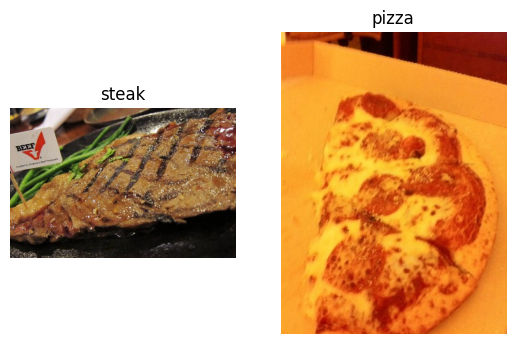

In [20]:
#Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")




# Step 2: Preprocess the data(prepare it for a model)


In [21]:
#Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

**Our Next step is to turn our data into batches**

A Batch is small subset of a dataset, rather than look at all the images at a time, a model might only look at 32 at a time for example.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

Why 32 ?

Because 32 is good for your health....(this is default value in the many libraries in the deeplearning)


In [22]:
#Create train and test datagenerators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.) # Turn each 1 image into 255 pixels this is the meaning of this line of code
test_datagen = ImageDataGenerator(rescale= 1/255.)



In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,            #Target directory of images
                                               target_size = (224, 224),         # Target size of images (Height, width)
                                               class_mode = "binary",            # type of data you'are working with
                                               batch_size = 32)                 # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode="binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
#Get a sample of train
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there ?

len(train_data)

47

In [26]:
# Get the first 2 images
images[ :2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [29]:
len(labels)

32

# Step 3: Create a CNN model (Start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.


Note : In deeplearning, there is almost infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (Ex : look which current model is performing best in the field for your problem)

#Filter#
Decides how many filters should pass over an input tensor(eg : sliding windows over an image), 10, 32, 64, 128 are typical values (higher values lead to more complex models)

#Kernel Size
Determines the shape of the filters (sliding windows) over the output. 3,5,7 (lowers values learn smaller features, higher values learn larger features)

# Padding
Pads the target tensor with zeros (if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), lowering output shape.
"same" or "valid" are the typical values

# Strides
The number of steps a filter takes across an image at a time (eg: if strides =1, a filter moves across an image 1 pixel at a time).




In [30]:
#Make the creating of our model a littele easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [31]:
# Create the model (this will be our baseline, a layer convolutional neural network)

model_4 = Sequential([
    Conv2D (filters = 10,                      # Decides how many filters should pass over an input tensor(eg : sliding windows over an image)
            kernel_size =3,
            strides =1,
            padding = "valid",
            activation = "relu",
            input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") #Output layer (working with binary classsification and only 1 output)
])